## 项目 0: 预测你的下一道世界料理

### 第一步. 下载并导入数据

In [57]:
## 请不要修改下方代码
# 导入依赖库
import json
import codecs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 加载数据集
train_filename='train.json'
train_content = pd.read_json(codecs.open(train_filename, mode='r', encoding='utf-8'))

test_filename = 'test.json'
test_content = pd.read_json(codecs.open(test_filename, mode='r', encoding='utf-8'))
    
# 打印加载的数据集数量
print("菜名数据集一共包含 {} 训练数据 和 {} 测试样例。\n".format(len(train_content), len(test_content)))
with open("whatcoding.txt", "w") as f:
    f.write("菜名数据1集一共包含 %s 训练数据 和 %s 测试样例。\n"%(len(train_content), len(test_content)))
    f.write("菜名数据2集一共包含 {} 训练数据 和 {} 测试样例。\n".format(len(train_content), len(test_content)))
f.close
if len(train_content)==39774 and len(test_content)==9944:
    print("数据成功载入！")
else:
    print("数据载入有问题，请检查文件路径！")

菜名数据集一共包含 39774 训练数据 和 9944 测试样例。

数据成功载入！


### 1.3 数据预览
为了查看我们的数据集的分布和菜品总共的种类，我们打印出部分数据样例。

In [31]:
## 请不要修改下方代码
pd.set_option('display.max_colwidth',120)

In [32]:
### TODO：打印train_content中前5个数据样例以预览数据
train_content.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes, garlic, pepper, purple onion, seasoning, garbanzo beans, feta cheese..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, ground black pepper, thyme, eggs, green tomatoes, yellow corn meal, mil..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, green chilies, grilled chicken breasts, garlic powder, yellow onion, so..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pepper, onions, garlic paste, milk, butter, salt, lemon juice, water, ch..."


In [33]:
## 请不要修改下方代码
## 查看总共菜品分类
categories=np.unique(train_content['cuisine'])
print("一共包含 {} 种菜品，分别是:\n{}".format(len(categories),categories))

一共包含 20 种菜品，分别是:
['brazilian' 'british' 'cajun_creole' 'chinese' 'filipino' 'french'
 'greek' 'indian' 'irish' 'italian' 'jamaican' 'japanese' 'korean'
 'mexican' 'moroccan' 'russian' 'southern_us' 'spanish' 'thai'
 'vietnamese']


### 分析数据

在项目的第二个部分，你会对菜肴数据进行初步的观察并给出你的分析。通过对数据的探索来熟悉数据可以让你更好地理解和解释你的结果。

由于这个项目的最终目标是建立一个预测世界菜系的模型，我们需要将数据集分为特征(Features)和目标变量(Target Variables)。

    特征: 'ingredients'，给我们提供了每个菜品所包含的佐料名称。
    目标变量：'cuisine'，是我们希望预测的菜系分类。
他们分别被存在 train_ingredients 和 train_targets 两个变量名中。

编程练习：数据提取

    将train_content中的ingredients赋值到train_integredients
    将train_content中的cuisine赋值到train_targets

In [46]:
### TODO：将特征与目标变量分别赋值
train_ingredients = train_content['ingredients']
train_targets = train_content['cuisine']

### TODO: 打印结果，检查是否正确赋值
# print(train_ingredients)
print(train_targets)

0               greek
1         southern_us
2            filipino
3              indian
4              indian
5            jamaican
6             spanish
7             italian
8             mexican
9             italian
10            italian
11            chinese
12            italian
13            mexican
14            italian
15             indian
16            british
17            italian
18               thai
19         vietnamese
20               thai
21            mexican
22        southern_us
23            chinese
24            italian
25            chinese
26       cajun_creole
27            italian
28            chinese
29            mexican
             ...     
39744           greek
39745         spanish
39746          indian
39747        moroccan
39748         italian
39749         mexican
39750         mexican
39751        moroccan
39752     southern_us
39753         italian
39754      vietnamese
39755          indian
39756         mexican
39757           greek
39758     

### 编程练习：基础统计运算
你的第一个编程练习是计算有关菜系佐料的统计数据。我们已为你导入了 numpy，你需要使用这个库来执行必要的计算。这些统计数据对于分析模型的预测结果非常重要的。 在下面的代码中，你要做的是：

* 使用最频繁的佐料前10分别有哪些？
* 意大利菜中最常见的10个佐料有哪些？

In [43]:
## TODO: 统计佐料出现次数，并赋值到sum_ingredients字典中
m = []
for i in range(len(train_ingredients)):
      m += train_ingredients[i]
sum_ingredients = pd.Series(m).value_counts()
print(sum_ingredients)

salt                                           18049
onions                                          7972
olive oil                                       7972
water                                           7457
garlic                                          7380
sugar                                           6434
garlic cloves                                   6237
butter                                          4848
ground black pepper                             4785
all-purpose flour                               4632
pepper                                          4438
vegetable oil                                   4385
eggs                                            3388
soy sauce                                       3296
kosher salt                                     3113
green onions                                    3078
tomatoes                                        3058
large eggs                                      2948
carrots                                       

In [54]:
## TODO: 统计意大利菜系中佐料出现次数，并赋值到italian_ingredients字典中
aa = train_content.loc[train_content['cuisine'].isin(['italian'])]['ingredients'].reset_index(drop=True)
n = []
for j in range(len(aa)):
    n += aa[j]
italian_ingredients = pd.Series(n).value_counts()
print(italian_ingredients)

salt                              3454
olive oil                         3111
garlic cloves                     1619
grated parmesan cheese            1580
garlic                            1471
ground black pepper               1444
extra-virgin olive oil            1362
onions                            1240
water                             1052
butter                            1030
pepper                             965
all-purpose flour                  918
fresh basil                        787
sugar                              760
dry white wine                     658
kosher salt                        656
black pepper                       636
fresh parsley                      631
eggs                               627
dried oregano                      626
large eggs                         625
tomatoes                           601
flat leaf parsley                  588
unsalted butter                    564
cooking spray                      491
parmesan cheese          

/Users/lidongzhu/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


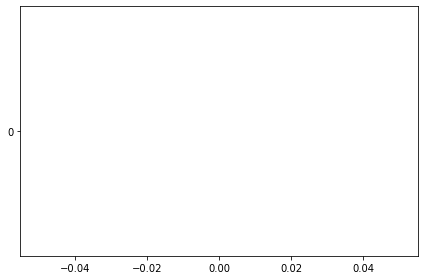

In [59]:
## 请不要修改下方代码
# Finally, plot the 10 most used ingredients
import sys
fig = pd.DataFrame(italian_ingredients, index=[0]).transpose()[0].sort_values(ascending=False, inplace=False)[:10].plot(kind='barh')
fig.invert_yaxis()
fig = fig.get_figure()
fig.tight_layout()
fig.show()

#### 第三步. 建立模型

3.1 单词清洗
由于菜品包含的佐料众多，同一种佐料也可能有单复数、时态等变化，为了去除这类差异，我们考虑将ingredients 进行过滤

In [63]:
## 请不要修改下方代码
import re
from nltk.stem import WordNetLemmatizer
import numpy as np

def text_clean(ingredients):
    #去除单词的标点符号，只保留 a..z A...Z的单词字符
    ingredients= np.array(ingredients).tolist()
    print("菜品佐料：\n{}".format(ingredients[9]))
    ingredients=[[re.sub('[^A-Za-z]', ' ', word) for word in component]for component in ingredients]
    print("去除标点符号之后的结果：\n{}".format(ingredients[9]))

    # 去除单词的单复数，时态，只保留单词的词干
    lemma=WordNetLemmatizer()
    ingredients=[" ".join([ " ".join([lemma.lemmatize(w) for w in words.split(" ")]) for words in component])  for component in ingredients]
    print("去除时态和单复数之后的结果：\n{}".format(ingredients[9]))
    return ingredients

print("\n处理训练集...")
train_ingredients = text_clean(train_content['ingredients'])
print("\n处理测试集...")
test_ingredients = text_clean(test_content['ingredients'])



处理训练集...
菜品佐料：
['chopped tomatoes', 'fresh basil', 'garlic', 'extra-virgin olive oil', 'kosher salt', 'flat leaf parsley']
去除标点符号之后的结果：
['chopped tomatoes', 'fresh basil', 'garlic', 'extra virgin olive oil', 'kosher salt', 'flat leaf parsley']
去除时态和单复数之后的结果：
chopped tomato fresh basil garlic extra virgin olive oil kosher salt flat leaf parsley

处理测试集...
菜品佐料：
['eggs', 'cherries', 'dates', 'dark muscovado sugar', 'ground cinnamon', 'mixed spice', 'cake', 'vanilla extract', 'self raising flour', 'sultana', 'rum', 'raisins', 'prunes', 'glace cherries', 'butter', 'port']
去除标点符号之后的结果：
['eggs', 'cherries', 'dates', 'dark muscovado sugar', 'ground cinnamon', 'mixed spice', 'cake', 'vanilla extract', 'self raising flour', 'sultana', 'rum', 'raisins', 'prunes', 'glace cherries', 'butter', 'port']
去除时态和单复数之后的结果：
egg cherry date dark muscovado sugar ground cinnamon mixed spice cake vanilla extract self raising flour sultana rum raisin prune glace cherry butter port


#### 3.2 特征提取
在该步骤中，我们将菜品的佐料转换成数值特征向量。考虑到绝大多数菜中都包含salt, water, sugar, butter等，采用one-hot的方法提取的向量将不能很好的对菜系作出区分。我们将考虑按照佐料出现的次数对佐料做一定的加权，即：佐料出现次数越多，佐料的区分性就越低。我们采用的特征为TF-IDF，相关介绍内容可以参考：TF-IDF与余弦相似性的应用（一）：自动提取关键词。

In [64]:
## 请不要修改下方代码
from sklearn.feature_extraction.text import TfidfVectorizer
# 将佐料转换成特征向量

# 处理 训练集
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 1),
                analyzer='word', max_df=.57, binary=False,
                token_pattern=r"\w+",sublinear_tf=False)
train_tfidf = vectorizer.fit_transform(train_ingredients).todense()

## 处理 测试集
test_tfidf = vectorizer.transform(test_ingredients)

In [65]:
## 请不要修改下方代码
train_targets=np.array(train_content['cuisine']).tolist()
train_targets[:10]

['greek',
 'southern_us',
 'filipino',
 'indian',
 'indian',
 'jamaican',
 'spanish',
 'italian',
 'mexican',
 'italian']

#### 编程练习
这里我们为了防止前面步骤中累积的错误，导致以下步骤无法正常运行。我们在此检查处理完的实验数据是否正确，请打印train_tfidf和train_targets中前五个数据。

In [66]:
# 你需要预览训练集train_tfidf,train_targets中前5条数据，试试Python的切片语法


#### 3.3 验证集划分
为了在实验中大致估计模型的精确度我们将从原本的train_ingredients 划分出 20% 的数据用作valid_ingredients。

编程练习：数据分割与重排
调用train_test_split函数将训练集划分为新的训练集和验证集，便于之后的模型精度观测。

从sklearn.model_selection中导入train_test_split
将train_tfidf和train_targets作为train_test_split的输入变量
设置test_size为0.2，划分出20%的验证集，80%的数据留作新的训练集。
设置random_state随机种子，以确保每一次运行都可以得到相同划分的结果。（随机种子固定，生成的随机序列就是确定的）

In [67]:
### TODO：划分出验证集

from sklearn.model_selection import train_test_split

X_train , X_valid , y_train, y_valid = None, None, None, None

#### 3.2 建立模型
调用 sklearn 中的逻辑回归模型（Logistic Regression）。

编程练习：训练模型
从sklearn.linear_model导入LogisticRegression
从sklearn.model_selection导入GridSearchCV, 参数自动搜索，只要把参数输进去，就能给出最优的结果和参数，这个方法适合小数据集。
定义parameters变量：为C参数创造一个字典，它的值是从1至10的数组;
定义classifier变量: 使用导入的LogisticRegression创建一个分类函数;
定义grid变量: 使用导入的GridSearchCV创建一个网格搜索对象；将变量'classifier', 'parameters'作为参数传至这个对象构造函数中；

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

## TODO: 建立逻辑回归模型
parameters = None

classifier = None

grid = None


## 请不要修改下方代码
grid = grid.fit(X_train, y_train)

模型训练结束之后，我们计算模型在验证集X_valid上预测结果，并计算模型的预测精度（与y_valid逐个比较）。

In [ ]:
## 请不要修改下方代码
from sklearn.metrics import accuracy_score ## 计算模型的准确率

valid_predict = grid.predict(X_valid)
valid_score=accuracy_score(y_valid,valid_predict)

print("验证集上的得分为：{}".format(valid_score))

### 第四步. 模型预测（可选）
4.1 预测测试集
编程练习
将模型grid对测试集test_tfidf做预测，然后查看预测结果。

In [ ]:
### TODO：预测测试结果
predictions = None

## 请不要修改下方代码
print("预测的测试集个数为：{}".format(len(predictions)))
test_content['cuisine']=predictions
test_content.head(10)

4.2 提交结果
为了更好的测试模型的效果，同时比较与其他人的差距，我们将模型的测试集上的结果提交至 kaggle What's Cooking? （需要提前注册kaggle账号）。

In [ ]:
## 加载结果格式
submit_frame = pd.read_csv("sample_submission.csv")
## 保存结果
result = pd.merge(submit_frame, test_content, on="id", how='left')
result = result.rename(index=str, columns={"cuisine_y": "cuisine"})
test_result_name = "tfidf_cuisine_test.csv"
result[['id','cuisine']].to_csv(test_result_name,index=False)


将生成的 tfidf_cuisine_test.csv 提交至 https://www.kaggle.com/c/whats-cooking/submit 然后选择 Upload Submission File, 点击 Make submission即可。稍作等待，就可以看到右上角的评分结果（得分大致为：0.78580 左右）。